# Timeseries Forecasting

In [1]:
!pip install pandas_datareader
!pip install tsfresh

     |████████████████████████████████| 95 kB 964 kB/s eta 0:00:011
     |████████████████████████████████| 169 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 966 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 322 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 282 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 3.4 MB/s eta 0:00:011
     |████████████████████████████████| 43 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 173 kB 2.5 MB/s eta 0:00:01


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import roll_time_series, make_forecasting_frame
from tsfresh.utilities.dataframe_functions import impute

import pandas_datareader.data as web

from sklearn.linear_model import LinearRegression

Для обучения возьмем данне Rīgas Fondu birža — фондовой биржы, располагающиеся в Риге (Латвия)

In [3]:
df = web.DataReader("^OMXR", 'stooq')["High"]
df.head()

Date
2023-09-05    1399.715
2023-09-04    1399.449
2023-09-01    1398.038
2023-08-31    1406.831
2023-08-30    1408.219
Name: High, dtype: float64

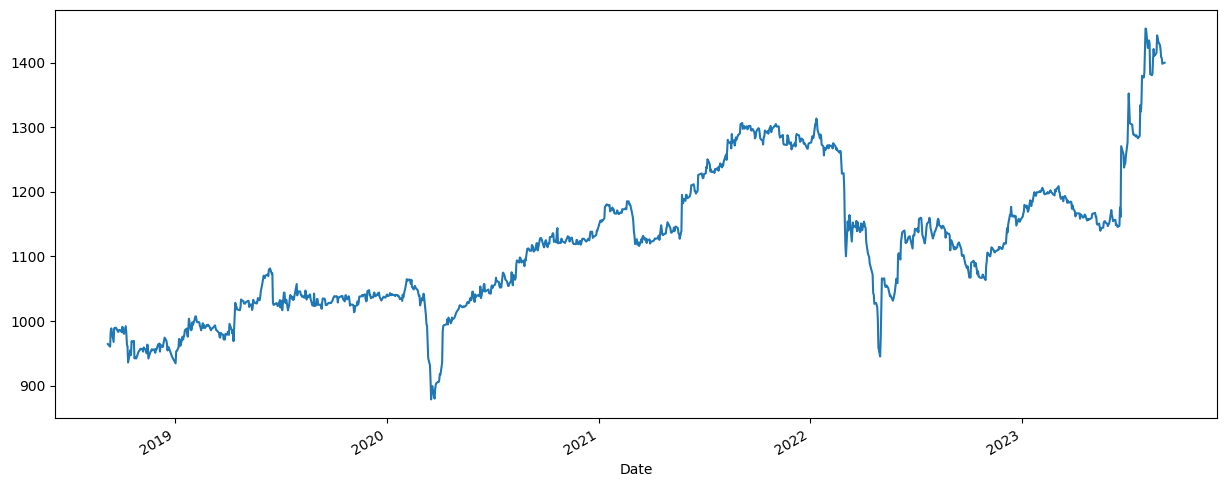

In [21]:
plt.figure(figsize=(15, 6))
df.plot(ax=plt.gca())
plt.show()

In [22]:
df_melted = pd.DataFrame({"high": df.copy()})
df_melted["date"] = df_melted.index
df_melted["Symbols"] = "^OMXR"

df_melted.head()

,high,date,Symbols
Date,,,
2023-09-05,1399.715,2023-09-05,^OMXR
2023-09-04,1399.449,2023-09-04,^OMXR
2023-09-01,1398.038,2023-09-01,^OMXR
2023-08-31,1406.831,2023-08-31,^OMXR
2023-08-30,1408.219,2023-08-30,^OMXR


In [23]:
df_rolled = roll_time_series(df_melted, column_id="Symbols", column_sort="date",
                             max_timeshift=20, min_timeshift=5)

/home/chris/.local/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(
Rolling: 100%|██████████████████████████████████| 39/39 [00:00<00:00, 95.90it/s]


In [24]:
df_rolled.head()

,high,date,Symbols,id
0,964.652,2018-09-07,^OMXR,"(^OMXR, 2018-09-14 00:00:00)"
1,961.303,2018-09-10,^OMXR,"(^OMXR, 2018-09-14 00:00:00)"
2,960.631,2018-09-11,^OMXR,"(^OMXR, 2018-09-14 00:00:00)"
3,983.860,2018-09-12,^OMXR,"(^OMXR, 2018-09-14 00:00:00)"
4,988.863,2018-09-13,^OMXR,"(^OMXR, 2018-09-14 00:00:00)"


In [43]:
df_rolled[df_rolled["id"] == ("^OMXR", pd.to_datetime("2022-03-29"))]

,high,date,Symbols,id
17625,1206.282,2022-03-01,^OMXR,"(^OMXR, 2022-03-29 00:00:00)"
17626,1153.654,2022-03-02,^OMXR,"(^OMXR, 2022-03-29 00:00:00)"
17627,1117.212,2022-03-03,^OMXR,"(^OMXR, 2022-03-29 00:00:00)"
17628,1100.483,2022-03-04,^OMXR,"(^OMXR, 2022-03-29 00:00:00)"
17629,1154.396,2022-03-07,^OMXR,"(^OMXR, 2022-03-29 00:00:00)"
17630,1140.166,2022-03-08,^OMXR,"(^OMXR, 2022-03-29 00:00:00)"
17631,1142.650,2022-03-09,^OMXR,"(^OMXR, 2022-03-29 00:00:00)"
17632,1164.169,2022-03-10,^OMXR,"(^OMXR, 2022-03-29 00:00:00)"
17633,1156.142,2022-03-11,^OMXR,"(^OMXR, 2022-03-29 00:00:00)"
17634,1123.111,2022-03-14,^OMXR,"(^OMXR, 2022-03-29 00:00:00)"


In [44]:
df_melted[(df_melted["date"] <= pd.to_datetime("2022-03-28")) &
          (df_melted["date"] >= pd.to_datetime("2022-04-29")) &
          (df_melted["Symbols"] == "^OMXR")]

,high,date,Symbols
Date,,,


In [45]:
len(df_melted)

1242

In [46]:
df_rolled["id"].nunique()

1237

In [47]:
df_rolled.groupby("id").size().agg([np.min, np.max])

amin     6
amax    21
dtype: int64

In [48]:
X = extract_features(df_rolled.drop("Symbols", axis=1),
                     column_id="id", column_sort="date", column_value="high",
                     impute_function=impute, show_warnings=False)

Feature Extraction: 100%|███████████████████████| 40/40 [00:08<00:00,  4.71it/s]


In [49]:
X.head()

high__variance_larger_than_standard_deviation  \
^OMXR 2018-09-14                                            1.0   
      2018-09-17                                            1.0   
      2018-09-18                                            1.0   
      2018-09-19                                            1.0   
      2018-09-20                                            1.0   

                  high__has_duplicate_max  high__has_duplicate_min  \
^OMXR 2018-09-14                      0.0                      0.0   
      2018-09-17                      0.0                      0.0   
      2018-09-18                      0.0                      0.0   
      2018-09-19                      0.0                      0.0   
      2018-09-20                      0.0                      0.0   

                  high__has_duplicate  high__sum_values  high__abs_energy  \
^OMXR 2018-09-14                  0.0          5842.679      5.690316e+06   
      2018-09-17                  0.0          6810.495      6.626984e+06   
      2018-09-18                  0.0          7799.558      7.605229e+06   
      2018-09-19                  0.0          8788.092      8.582429e+06   
      2018-09-20                  0.0          9777.451      9.561260e+06   

                  high__mean_abs_change  high__mean_change  \
^OMXR 2018-09-14               7.549200           3.743600   
      2018-09-17               8.883333           0.527333   
      2018-09-18              10.649571           3.487286   
      2018-09-19               9.384500           2.985250   
      2018-09-20               8.433444           2.745222   

                  high__mean_second_derivative_central  high__median  ...  \
^OMXR 2018-09-14                             -0.268000       974.011  ...   
      2018-09-17                             -1.220500       967.816  ...   
      2018-09-18                              2.049667       975.593  ...   
      2018-09-19                              0.201429       983.370  ...   
      2018-09-20                              0.260875       983.615  ...   

                  high__fourier_entropy__bins_5  \
^OMXR 2018-09-14                       1.039721   
      2018-09-17                       1.386294   
      2018-09-18                       1.054920   
      2018-09-19                       0.950271   
      2018-09-20                       0.636514   

                  high__fourier_entropy__bins_10  \
^OMXR 2018-09-14                        1.039721   
      2018-09-17                        1.386294   
      2018-09-18                        1.054920   
      2018-09-19                        1.332179   
      2018-09-20                        0.636514   

                  high__fourier_entropy__bins_100  \
^OMXR 2018-09-14                         1.386294   
      2018-09-17                         1.386294   
      2018-09-18                         1.332179   
      2018-09-19                         1.609438   
      2018-09-20                         1.791759   

                  high__permutation_entropy__dimension_3__tau_1  \
^OMXR 2018-09-14                                       1.386294   
      2018-09-17                                       1.332179   
      2018-09-18                                       1.329661   
      2018-09-19                                       1.549826   
      2018-09-20                                       1.494175   

                  high__permutation_entropy__dimension_4__tau_1  \
^OMXR 2018-09-14                                       1.098612   
      2018-09-17                                       1.386294   
      2018-09-18                                       1.332179   
      2018-09-19                                       1.560710   
      2018-09-20                                       1.747868   

                  high__permutation_entropy__dimension_5__tau_1  \
^OMXR 2018-09-14                                       0.693147   
      2018-09-17

In [50]:
X = X.set_index(X.index.map(lambda x: x[1]), drop=True)
X.index.name = "last_date"
X.head()

,high__variance_larger_than_standard_deviation,high__has_duplicate_max,high__has_duplicate_min,high__has_duplicate,high__sum_values,high__abs_energy,high__mean_abs_change,high__mean_change,high__mean_second_derivative_central,high__median,...,high__fourier_entropy__bins_5,high__fourier_entropy__bins_10,high__fourier_entropy__bins_100,high__permutation_entropy__dimension_3__tau_1,high__permutation_entropy__dimension_4__tau_1,high__permutation_entropy__dimension_5__tau_1,high__permutation_entropy__dimension_6__tau_1,high__permutation_entropy__dimension_7__tau_1,high__query_similarity_count__query_None__threshold_0.0,high__mean_n_absolute_max__number_of_maxima_7
last_date,,,,,,,,,,,,,,,,,,,,,
2018-09-14,1.0,0.0,0.0,0.0,5842.679,5.690316e+06,7.549200,3.743600,-0.268000,974.011,...,1.039721,1.039721,1.386294,1.386294,1.098612,0.693147,-0.000000,2.708050,0.0,1128.918714
2018-09-17,1.0,0.0,0.0,0.0,6810.495,6.626984e+06,8.883333,0.527333,-1.220500,967.816,...,1.386294,1.386294,1.386294,1.332179,1.386294,1.098612,0.693147,-0.000000,0.0,1128.918714
2018-09-18,1.0,0.0,0.0,0.0,7799.558,7.605229e+06,10.649571,3.487286,2.049667,975.593,...,1.054920,1.054920,1.332179,1.329661,1.332179,1.386294,1.098612,0.693147,0.0,976.989571
2018-09-19,1.0,0.0,0.0,0.0,8788.092,8.582429e+06,9.384500,2.985250,0.201429,983.370,...,0.950271,1.332179,1.609438,1.549826,1.560710,1.609438,1.386294,1.098612,0.0,980.879714
2018-09-20,1.0,0.0,0.0,0.0,9777.451,9.561260e+06,8.433444,2.745222,0.260875,983.615,...,0.636514,0.636514,1.791759,1.494175,1.747868,1.791759,1.609438,1.386294,0.0,984.409286


In [51]:
X.loc['2022-03-28']

high__variance_larger_than_standard_deviation                  1.000000
high__has_duplicate_max                                        0.000000
high__has_duplicate_min                                        0.000000
high__has_duplicate                                            0.000000
high__sum_values                                           24148.864000
                                                               ...     
high__permutation_entropy__dimension_5__tau_1                  2.833213
high__permutation_entropy__dimension_6__tau_1                  2.772589
high__permutation_entropy__dimension_7__tau_1                  2.708050
high__query_similarity_count__query_None__threshold_0.0        0.000000
high__mean_n_absolute_max__number_of_maxima_7               1174.066857
Name: 2022-03-28 00:00:00, Length: 783, dtype: float64

In [52]:
y = df_melted.set_index("date").sort_index().high.shift(-1)

Quick consistency test:

In [54]:
y["2022-03-28"], df["2022-04-29"]

(1138.146, 959.297)

In [55]:
y = y[y.index.isin(X.index)]
X = X[X.index.isin(y.index)]

In [56]:
X[:"2020"]

,high__variance_larger_than_standard_deviation,high__has_duplicate_max,high__has_duplicate_min,high__has_duplicate,high__sum_values,high__abs_energy,high__mean_abs_change,high__mean_change,high__mean_second_derivative_central,high__median,...,high__fourier_entropy__bins_5,high__fourier_entropy__bins_10,high__fourier_entropy__bins_100,high__permutation_entropy__dimension_3__tau_1,high__permutation_entropy__dimension_4__tau_1,high__permutation_entropy__dimension_5__tau_1,high__permutation_entropy__dimension_6__tau_1,high__permutation_entropy__dimension_7__tau_1,high__query_similarity_count__query_None__threshold_0.0,high__mean_n_absolute_max__number_of_maxima_7
last_date,,,,,,,,,,,,,,,,,,,,,
2018-09-14,1.0,0.0,0.0,0.0,5842.679,5.690316e+06,7.549200,3.743600,-0.268000,974.011,...,1.039721,1.039721,1.386294,1.386294,1.098612,0.693147,-0.000000,2.708050,0.0,1128.918714
2018-09-17,1.0,0.0,0.0,0.0,6810.495,6.626984e+06,8.883333,0.527333,-1.220500,967.816,...,1.386294,1.386294,1.386294,1.332179,1.386294,1.098612,0.693147,-0.000000,0.0,1128.918714
2018-09-18,1.0,0.0,0.0,0.0,7799.558,7.605229e+06,10.649571,3.487286,2.049667,975.593,...,1.054920,1.054920,1.332179,1.329661,1.332179,1.386294,1.098612,0.693147,0.0,976.989571
2018-09-19,1.0,0.0,0.0,0.0,8788.092,8.582429e+06,9.384500,2.985250,0.201429,983.370,...,0.950271,1.332179,1.609438,1.549826,1.560710,1.609438,1.386294,1.098612,0.0,980.879714
2018-09-20,1.0,0.0,0.0,0.0,9777.451,9.561260e+06,8.433444,2.745222,0.260875,983.615,...,0.636514,0.636514,1.791759,1.494175,1.747868,1.791759,1.609438,1.386294,0.0,984.409286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,1.0,0.0,0.0,0.0,23643.838,2.662108e+07,3.056750,0.155450,-0.242158,1125.405,...,0.994924,1.414279,2.271869,1.548489,2.351257,2.751667,2.772589,2.708050,0.0,1131.182000
2020-12-23,1.0,0.0,0.0,0.0,23648.136,2.663077e+07,3.103050,0.228050,0.178526,1125.405,...,0.994924,1.366711,2.271869,1.634167,2.476221,2.751667,2.772589,2.708050,0.0,1131.561857
2020-12-28,1.0,0.0,0.0,0.0,23655.862,2.664822e+07,2.981550,0.666050,0.106395,1125.729,...,1.120950,1.540306,2.098274,1.666876,2.476221,2.751667,2.772589,2.708050,0.0,1132.388571


In [57]:
X_train = X[:"2020"]
X_test = X["2021":]

y_train = y[:"2020"]
y_test = y["2021":]

In [58]:
X_train_selected = select_features(X_train, y_train)

In [59]:
ada = LinearRegression()

ada.fit(X_train_selected, y_train)

LinearRegression()

In [60]:
X_test_selected = X_test[X_train_selected.columns]

y_pred = pd.Series(ada.predict(X_test_selected), index=X_test_selected.index)

<Axes: xlabel='last_date'>

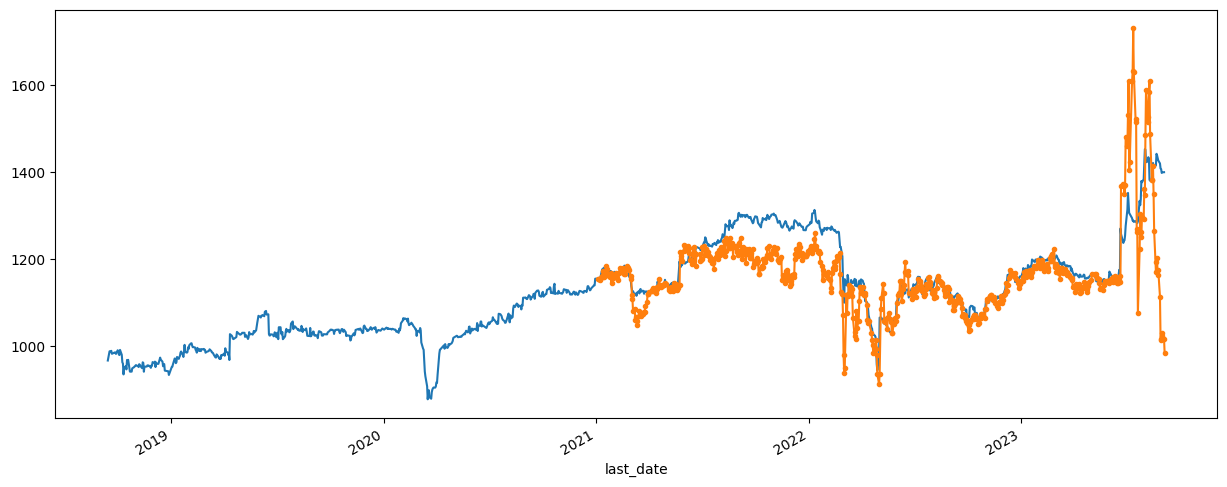

In [61]:
plt.figure(figsize=(15, 6))

y.plot(ax=plt.gca())
y_pred.plot(ax=plt.gca(), legend=None, marker=".")